In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
train_metadata = pd.read_csv("data/train_metadata.csv")

In [3]:
train_metadata

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,zebdov,[],"['adult', 'song']",22.6499,120.2872,Geopelia striata,Zebra Dove,Jerome Chie-Jen Ko,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:36,https://www.xeno-canto.org/629769,zebdov/XC629769.ogg
14848,zebdov,[],"['adult', 'sex uncertain', 'song']",1.4168,103.7287,Geopelia striata,Zebra Dove,Kim Chuah Lim,Creative Commons Attribution-NonCommercial-Sha...,4.0,08:00,https://www.xeno-canto.org/642415,zebdov/XC642415.ogg
14849,zebdov,[],"['adult', 'call', 'sex uncertain']",1.4347,103.7043,Geopelia striata,Zebra Dove,Kim Chuah Lim,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/665873,zebdov/XC665873.ogg
14850,zebdov,[],['song'],3.3508,101.2451,Geopelia striata,Zebra Dove,Jelle Scharringa,Creative Commons Attribution-NonCommercial-Sha...,2.5,11:15,https://www.xeno-canto.org/666194,zebdov/XC666194.ogg


## Check example data

In [7]:
def add_path(x):
    return "data/train_audio/" + x
train_metadata['filename'] = train_metadata['filename'].apply(add_path)
train_metadata

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,data/train_audio/afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,data/train_audio/afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,data/train_audio/afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,data/train_audio/afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,data/train_audio/afrsil1/XC207431.ogg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,zebdov,[],"['adult', 'song']",22.6499,120.2872,Geopelia striata,Zebra Dove,Jerome Chie-Jen Ko,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:36,https://www.xeno-canto.org/629769,data/train_audio/zebdov/XC629769.ogg
14848,zebdov,[],"['adult', 'sex uncertain', 'song']",1.4168,103.7287,Geopelia striata,Zebra Dove,Kim Chuah Lim,Creative Commons Attribution-NonCommercial-Sha...,4.0,08:00,https://www.xeno-canto.org/642415,data/train_audio/zebdov/XC642415.ogg
14849,zebdov,[],"['adult', 'call', 'sex uncertain']",1.4347,103.7043,Geopelia striata,Zebra Dove,Kim Chuah Lim,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/665873,data/train_audio/zebdov/XC665873.ogg
14850,zebdov,[],['song'],3.3508,101.2451,Geopelia striata,Zebra Dove,Jelle Scharringa,Creative Commons Attribution-NonCommercial-Sha...,2.5,11:15,https://www.xeno-canto.org/666194,data/train_audio/zebdov/XC666194.ogg


In [46]:
import random
import soundfile as sf
import IPython.display as ipd
random_number = random.randint(0, len(train_metadata))
random_file = train_metadata.iloc[random_number]
path_to_file = random_file['filename']

In [47]:
print("Type: ", random_file['type'])
print("Primary label: ", random_file['primary_label'])
ipd.Audio(random_file['filename'])

Type:  ['adult', 'call', 'sex uncertain']
Primary label:  wiltur


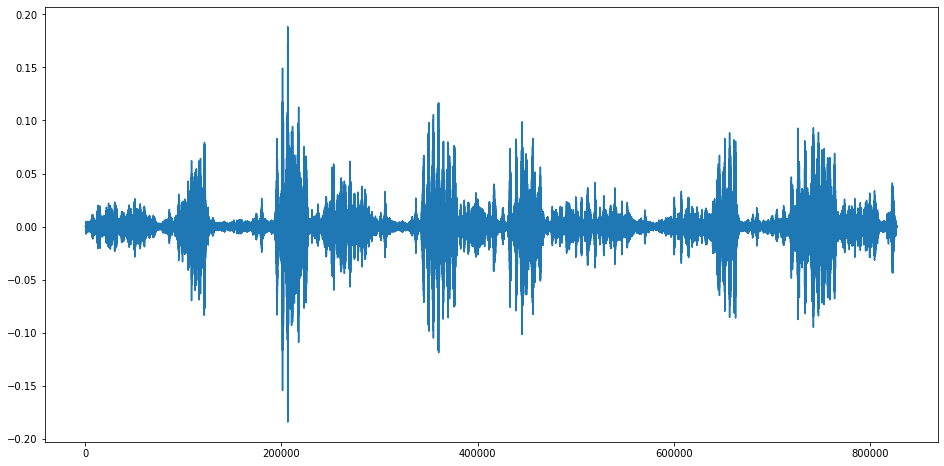

In [55]:
sound, _ = sf.read(path_to_file)
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=np.arange(len(sound)), y=sound, ax=ax);